In [1]:
#importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file="C:\\Users\\hp\\Downloads\\archive (13)\\survey.csv"

#Reading all data from file
df=pd.read_csv(file)

In [2]:
df.head()

,index,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [3]:
#dropping the index column
df=df.drop("index",axis=1)

df["Timestamp"].describe()
type(df["Timestamp"][0])

str

In [4]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])  # Convert to datetime
df['Year'] = df['Timestamp'].dt.year  # Extract the year
df=df.drop("Timestamp",axis=1)


In [5]:
df["Age"].isna().sum()

0

In [6]:
df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [7]:
# function to clean and categorize Gender column into Male, Female, and Unknown
def clean_gender(gender):
    gender = str(gender).lower()
    
    if gender in ['male', 'm', 'man', 'cis male', 'male-ish', 'male (cis)', 'msle', 'mal', 'malr', 'male ', 'man']:
        return 'Male'
    elif gender in ['female', 'f', 'woman', 'cis female', 'female (cis)', 'female (trans)', 'femake', 'femail', 'f ', 'female ']:
        return 'Female'
    else:
        return 'Unknown'

# Apply the function to the Gender column
df['Cleaned Gender'] = df['Gender'].apply(clean_gender)

# Display the count of each category
print(df['Cleaned Gender'].value_counts())


Cleaned Gender
Male       984
Female     248
Unknown     27
Name: count, dtype: int64


In [8]:
#Removing orignal column
df=df.drop("Gender",axis=1)

#Renaming the standardized Gender column
df=df.rename(columns={"Cleaned Gender":"Gender"})

In [9]:
df.head()

,Age,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,Year,Gender
0,37,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,...,No,Some of them,Yes,No,Maybe,Yes,No,NaN,2014,Female
1,44,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,...,No,No,No,No,No,Don't know,No,NaN,2014,Male
2,32,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,...,No,Yes,Yes,Yes,Yes,No,No,NaN,2014,Male
3,31,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,...,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN,2014,Male
4,31,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,...,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,2014,Male


In [10]:
df.isna().sum()

Age                             0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
Year                            0
Gender                          0
dtype: int64

In [11]:
#Missing value imputation
df["state"]=df["state"].fillna("Unknown")
df['self_employed']=df['self_employed'].fillna("Unknown")
df["work_interfere"]=df['work_interfere'].fillna("Unknown")
df['comments']=df['comments'].fillna("Unknown")
df.head()


,Age,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,Year,Gender
0,37,United States,IL,Unknown,No,Yes,Often,6-25,No,Yes,...,No,Some of them,Yes,No,Maybe,Yes,No,Unknown,2014,Female
1,44,United States,IN,Unknown,No,No,Rarely,More than 1000,No,No,...,No,No,No,No,No,Don't know,No,Unknown,2014,Male
2,32,Canada,Unknown,Unknown,No,No,Rarely,6-25,No,Yes,...,No,Yes,Yes,Yes,Yes,No,No,Unknown,2014,Male
3,31,United Kingdom,Unknown,Unknown,Yes,Yes,Often,26-100,No,Yes,...,Yes,Some of them,No,Maybe,Maybe,No,Yes,Unknown,2014,Male
4,31,United States,TX,Unknown,No,No,Never,100-500,Yes,Yes,...,No,Some of them,Yes,Yes,Yes,Don't know,No,Unknown,2014,Male


In [12]:
df.columns

Index(['Age', 'Country', 'state', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments', 'Year', 'Gender'],
      dtype='object')

In [13]:
# getting unique values of each column
for i in df:
    print(i," : ",df[i].unique())

Age  :  [         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]
Country  :  ['United States' 'Canada' 'United Kingdom' 'Bulgaria' 'France' 'Portugal'
 'Netherlands' 'Switzerland' 'Poland' 'Australia' 'Germany' 'Russia'
 'Mexico' 'Brazil' 'Slovenia' 'Costa Rica' 'Austria' 'Ireland' 'India'
 'South Africa' 'Italy' 'Sweden' 'Colombia' 'Latvia' 'Romania' 'Belgium'
 'New Zealand' 'Zimbabwe' 'Spain' 'Finland' 'Ur

In [14]:
#Removing the comments column
df=df.drop("comments",axis=1)

In [15]:
#Filling the outliers with the median value of age
age_outlier_indexes=df[(df['Age'] < 15) | (df['Age'] > 70)].index
for i in range(len(age_outlier_indexes)):
    df["Age"][age_outlier_indexes[i]]=df["Age"].median()

C:\Users\hp\AppData\Local\Temp\ipykernel_9756\3278909769.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["Age"][age_outlier_indexes[i]]=df["Age"].median()
C:\Users\hp\AppData\Local\Temp\ipykernel_9756\3278909769.py:4: SettingWithCopyW

In [16]:
# Rename the column
df.rename(columns={"remote_work": "Work_mode"}, inplace=True)

# Update values in the "Work_mode" column
df['Work_mode'] = df['Work_mode'].apply(lambda x: "Remote" if x == "Yes" else "Onsite")


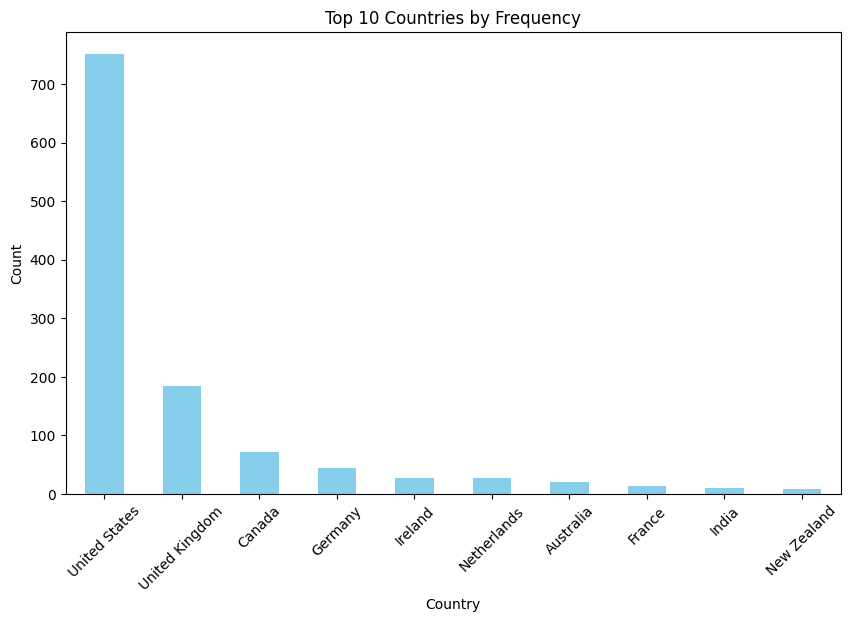

In [18]:
#Displaying the country that has the most responses in the dataset.

#Plot of bar graph of top 10 countries
df["Country"].value_counts().head(10).plot(kind="bar", figsize=(10, 6), color='skyblue')
plt.title("Top 10 Countries by Frequency")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45) # rotation of x-axis label
plt.show()


In [19]:
# The data is collected from 48 countries, with the majority of responses coming from residents of the United States. This suggests that the conclusions drawn from the analysis will predominantly reflect the perspectives of U.S. individuals.

Gender
Female     248
Male       984
Unknown     27
dtype: int64


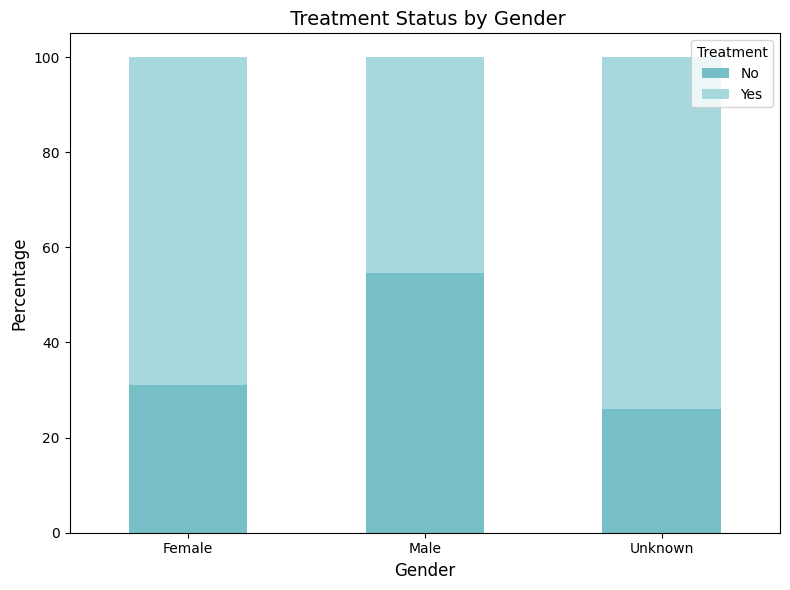

In [20]:
#Visualizing how treatment-seeking behavior varies by gender.

# Counting the number of records for each gender to analyze the gender distribution in the dataset
print(df.groupby("Gender").size())


# Get the counts of treatment categories for each gender
gender_treatment_counts = df.groupby("Gender")["treatment"].value_counts().unstack(fill_value=0)

# Normalize the counts to get percentages
gender_treatment_percentage = gender_treatment_counts.div(gender_treatment_counts.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
gender_treatment_percentage.plot(kind="bar", stacked=True, figsize=(8, 6), color=["#77BFC7", "#A7D8DE"])

# Adding labels and title
plt.title(" Treatment Status by Gender", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.legend(title="Treatment", labels=["No", "Yes"], loc="upper right")
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()


In [21]:
# Conclusion: The dataset shows a higher number of male respondents compared to females. Among those seeking treatment, approximately 70% of females have taken treatment, while around 55% of males have done the same.

In [22]:
# Group the data by "Work_mode" and "treatment" columns, and count the occurrences in each group
treatment_by_work_mode = df.groupby(["Work_mode", "treatment"]).size().unstack()


In [23]:
treatment_by_work_mode

treatment,No,Yes
Work_mode,,
Onsite,444,439
Remote,178,198


In [24]:
# Calculate the percentage for each Work_mode group
# Divide each value by the row sum (total for each Work_mode group) and multiply by 100
treatment_percentage_by_work_mode = treatment_by_work_mode.div(treatment_by_work_mode.sum(axis=1), axis=0) * 100
treatment_percentage_by_work_mode

treatment,No,Yes
Work_mode,,
Onsite,50.283126,49.716874
Remote,47.340426,52.659574


In [25]:
# Group data by family history of mental health and treatment status
treatment_by_family_history = df.groupby(["family_history", "treatment"]).size().unstack(fill_value=0)


In [26]:
# Calculate the percentage for each Work_mode group
# Divide each value by the row sum (total for each Work_mode group) and multiply by 100
treatment_percentage_by_family_history = treatment_by_family_history.div(treatment_by_family_history.sum(axis=1), axis=0) * 100
treatment_percentage_by_family_history

treatment,No,Yes
family_history,,
No,64.537158,35.462842
Yes,25.813008,74.186992


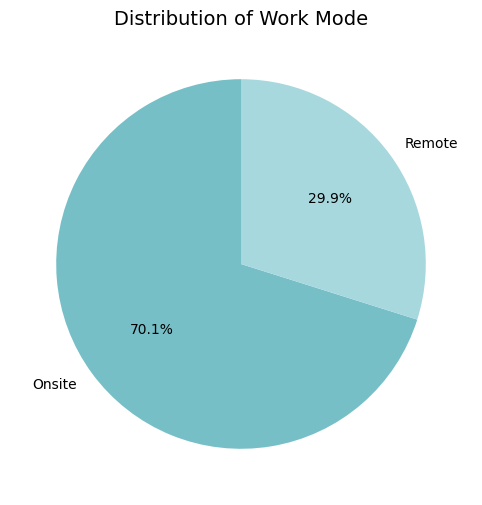

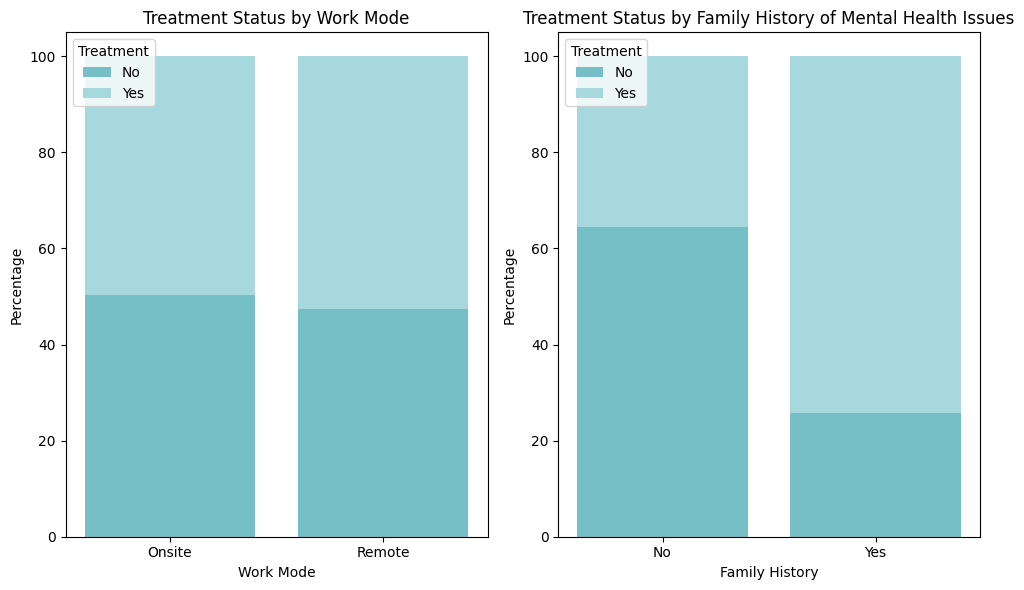

In [27]:
'''Analyzing whether treatment-seeking behavior differs between remote and onsite workers, 
and how a family history of mental health issues impacts this behavior.'''


# Value counts and labels for the pie chart
remote_work_counts = df["Work_mode"].value_counts()
labels = remote_work_counts.index

# Pie chart 
colors = ["#77BFC7", "#A7D8DE"]
plt.figure(figsize=(8, 6))  # Adjusting figure size
plt.pie(remote_work_counts, labels=labels, autopct="%1.1f%%", colors=colors, startangle=90)
plt.title("Distribution of Work Mode", fontsize=14)  # Add a title
plt.show()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

#  plot (Treatment Status by Work Mode)
axes[0].bar(treatment_percentage_by_work_mode.index, treatment_percentage_by_work_mode["No"], color="#77BFC7", label="No")
axes[0].bar(treatment_percentage_by_work_mode.index, treatment_percentage_by_work_mode["Yes"], bottom=treatment_percentage_by_work_mode["No"], color="#A7D8DE", label="Yes")

# Adding labels and title for the first subplot
axes[0].set_title('Treatment Status by Work Mode')
axes[0].set_xlabel('Work Mode')
axes[0].set_ylabel('Percentage')
axes[0].set_xticks(treatment_percentage_by_work_mode.index)
axes[0].set_xticklabels(treatment_percentage_by_work_mode.index, rotation=0)  
axes[0].legend(title='Treatment', loc='upper left')

#  plot (Treatment Status by Family History of Mental Health Issues)
axes[1].bar(treatment_percentage_by_family_history.index, treatment_percentage_by_family_history["No"], color="#77BFC7", label="No")
axes[1].bar(treatment_percentage_by_family_history.index, treatment_percentage_by_family_history["Yes"], bottom=treatment_percentage_by_family_history["No"], color="#A7D8DE", label="Yes")

# Adding labels and title for the second subplot
axes[1].set_title('Treatment Status by Family History of Mental Health Issues')
axes[1].set_xlabel('Family History')
axes[1].set_ylabel('Percentage')
axes[1].set_xticks(treatment_percentage_by_family_history.index)
axes[1].set_xticklabels(treatment_percentage_by_family_history.index, rotation=0)
axes[1].legend(title='Treatment', loc='upper left')

# Show plot
plt.tight_layout()
plt.show()


In [28]:
# In the dataset, 70.1% of respondents work onsite, while 29.9% work remotely. The treatment-seeking behavior is nearly identical between both work modes (remote and onsite). It has been observed that individuals who experience mental health issues and also have a family history of mental health problems are more likely to take treatment. Conversely, the frequency of individuals with mental health issues who do not take treatment, and those with no family history of mental health issues, is higher in this group as well.

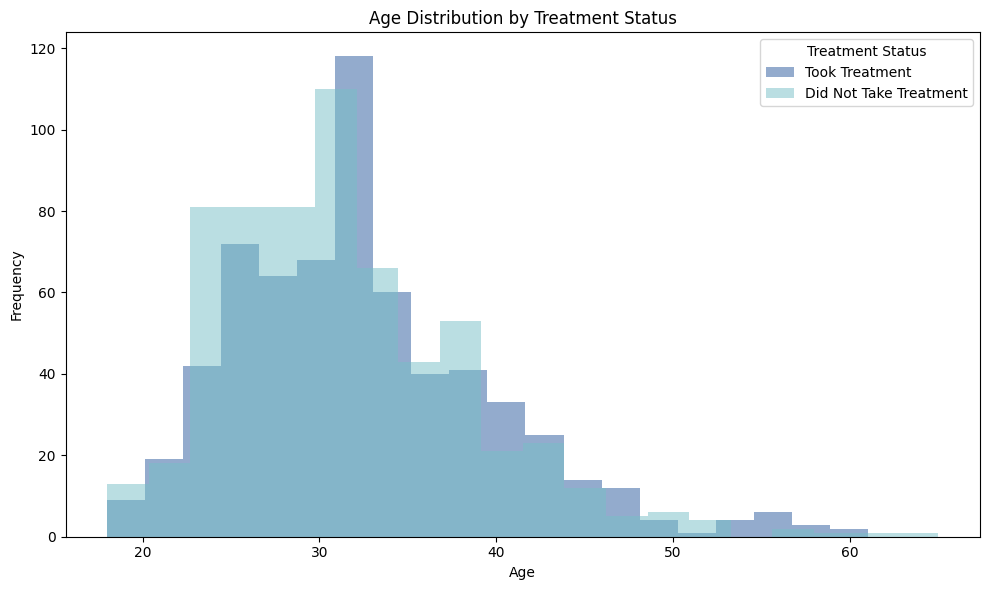

In [29]:
# Comparing the age distribution between those who seek treatment and those who do not.

# Separate the data based on treatment status
took_treatment = df[df["treatment"] == "Yes"]
did_not_take_treatment = df[df["treatment"] == "No"]

# Create the histogram
plt.figure(figsize=(10, 6))

# Plot for those who took the treatment
plt.hist(took_treatment["Age"], bins=20, alpha=0.5, label="Took Treatment", color="#28589C")

# Plot for those who did not take the treatment
plt.hist(did_not_take_treatment["Age"], bins=20, alpha=0.5, label="Did Not Take Treatment", color="#77BFC7")

# Add labels and title
plt.title('Age Distribution by Treatment Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Treatment Status')

# Show plot
plt.tight_layout()
plt.show()

In [30]:
# The frequency of individuals not taking treatment is higher in the 20 to 32 age group compared to those who are seeking treatment within the same age group.

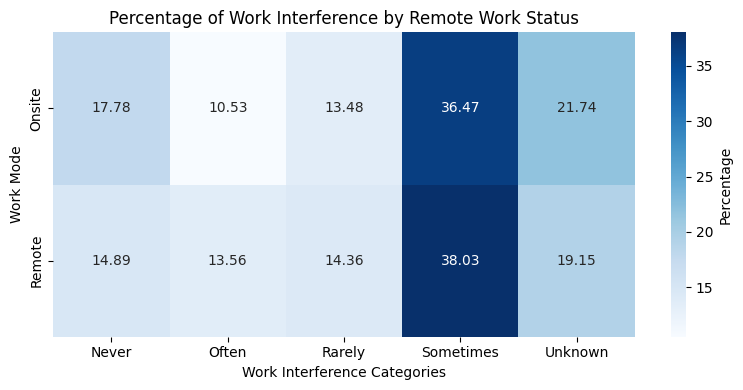

In [31]:
# Investigating the extent to which mental health issues interfere with work.

# Group by 'Work Mode' and get the percentage of each 'Work Interference' category
work_interference_percentage_by_mode = df.groupby('Work_mode')['work_interfere'].value_counts(normalize=True) * 100

# Pivot the data to get a table format suitable for the heatmap
work_interference_percentage_by_mode = work_interference_percentage_by_mode.unstack(fill_value=0)

# Create the heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(work_interference_percentage_by_mode, annot=True, cmap='Blues', fmt='.2f', cbar_kws={'label': 'Percentage'})

# Add labels and title
plt.title('Percentage of Work Interference by Remote Work Status')
plt.xlabel('Work Interference Categories')
plt.ylabel('Work Mode')

# Show the plot
plt.tight_layout()
plt.show()


In [32]:
# In both work modes, the frequency of individuals experiencing work interference due to their mental health is highest in the "Sometimes" category. This suggests that the perceived interference in work may lead to reduced productivity, potentially contributing to mental health issues such as anxiety or stress

In [33]:
# Clean up the no_employees column by stripping spaces (if any)
df['no_employees'] = df['no_employees'].str.strip()

# Employee categories mapping
workplace_size_mapping = {
    '1-5': 'Small',
    '6-25': 'Small',
    '26-100': 'Medium',
    '100-500': 'Medium',
    '500-1000': 'Large',
    'More than 1000': 'Large'
}

# Apply the mapping to create a new column with the categorized values
df['workplace_size'] = df['no_employees'].map(workplace_size_mapping)

df=df.drop('no_employees',axis=1)


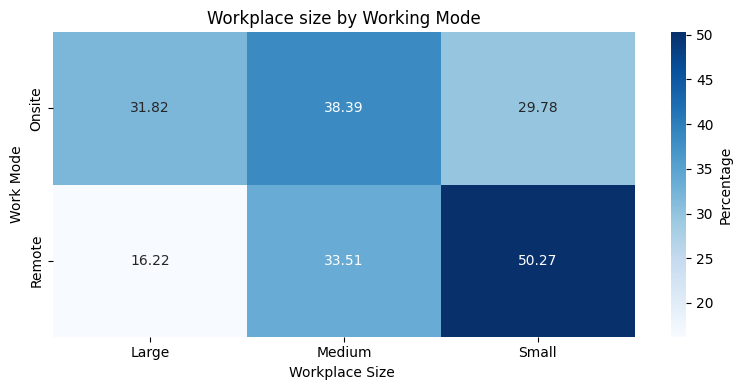

In [34]:
# Showing the distribution of workplace sizes for both remote and onsite workers.

# Group by 'Work Mode' and get the percentage of each 'Workplace Size' category
employee_presence_by_work_mode = df.groupby('Work_mode')['workplace_size'].value_counts(normalize=True) * 100

# Pivot the data to get a table format suitable for the heatmap
employee_presence_by_work_mode = employee_presence_by_work_mode.unstack(fill_value=0)

# Create the heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(employee_presence_by_work_mode, annot=True, cmap='Blues', fmt='.2f', cbar_kws={'label': 'Percentage'})

# Add labels and title
plt.title('Workplace size by Working Mode')
plt.xlabel('Workplace Size ')
plt.ylabel('Work Mode')

# Show the plot
plt.tight_layout()
plt.show()


In [35]:
# Workplace size refers to the number of employees in the workplace, categorized as small, medium, or large. In the onsite mode, employees are fairly evenly distributed across these categories. However, in remote work, 50.27% of individuals work in small workplaces. This raises the question of whether those working in smaller remote workplaces are less likely to seek treatment.

In [36]:
# Filter the data for remote working people
remote_working_people = df[df['Work_mode'] == "Remote"]

# Create a pivot table to analyze treatment status by workplace size for remote workers
pivot_table_remote_treatment = remote_working_people.pivot_table(
    index='workplace_size',  # Rows represent workplace size categories
    columns="treatment",  # Columns represent treatment status (Yes or No)
    aggfunc='size',  # Count the occurrences of each combination
    fill_value=0  # Fill missing values with 0
).apply(lambda x: x / x.sum() * 100, axis=1)  # Normalize each row to get percentages


In [37]:
pivot_table_remote_treatment

treatment,No,Yes
workplace_size,,
Large,55.737705,44.262295
Medium,40.476190,59.523810
Small,49.206349,50.793651


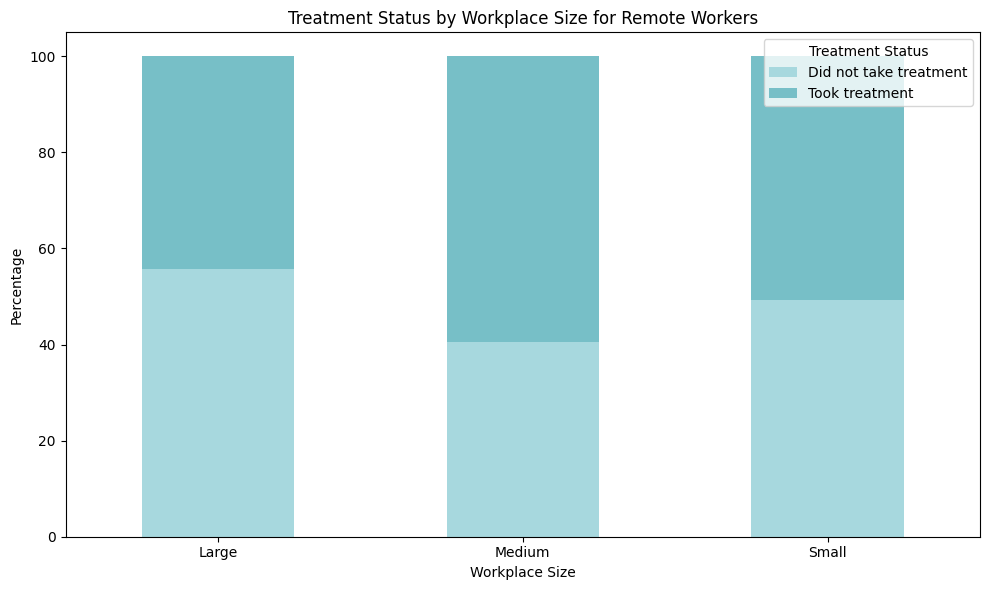

In [38]:
# Examining whether remote workers in smaller workplaces are less likely to seek treatment.
# Plotting the bar graph
ax = pivot_table_remote_treatment.plot(kind="bar", stacked=True, color=["#A7D8DE", "#77BFC7"], figsize=(10, 6))

# Adding titles and labels
plt.title('Treatment Status by Workplace Size for Remote Workers')
plt.xlabel('Workplace Size')
plt.ylabel('Percentage')
plt.xticks(rotation=0)  # Keep x labels horizontal

# Set the legend with custom labels
plt.legend(["Did not take treatment", "Took treatment"], title="Treatment Status")

# Show the plot
plt.tight_layout()
plt.show()


In [39]:
# Approximately 50% of individuals have taken treatment, while the other 50% have not. However, in large workplaces, around 60% of people have not sought treatment, despite only 16% of the overall participants working in large workplaces.

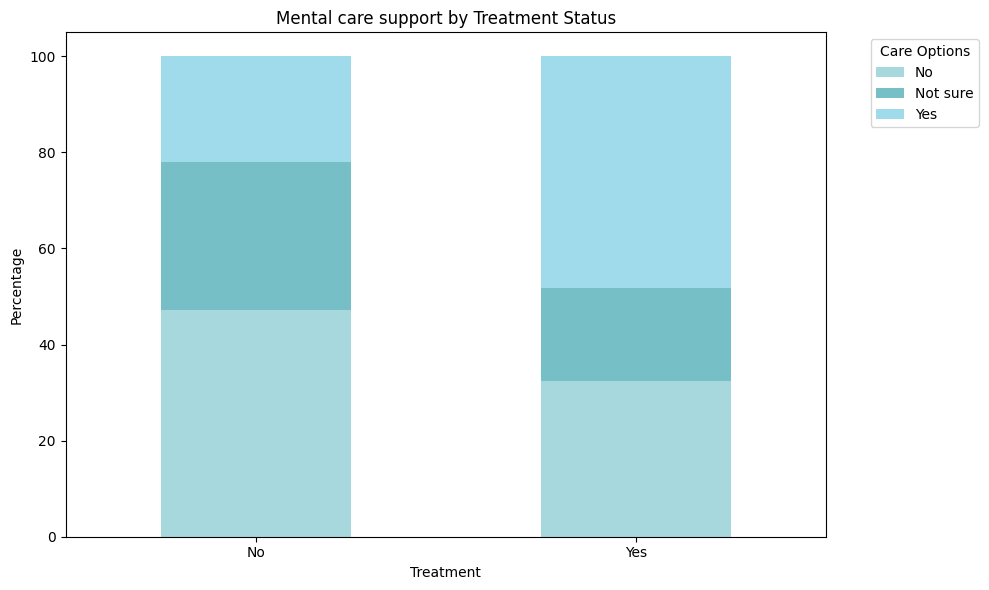

In [40]:
#Analyzing whether having mental health care options at the workplace influences the likelihood of taking treatment.

# Group by 'treatment' and 'care_options', then get the counts
treatment_care_options = df.groupby(['treatment', 'care_options']).size().unstack()

# Normalize to get percentage
treatment_care_options_percent = treatment_care_options.divide(treatment_care_options.sum(axis=1), axis=0) * 100

# Plot the stacked bar graph
treatment_care_options_percent.plot(kind='bar', stacked=True, figsize=(10,6), color=["#A7D8DE","#77BFC7", "#a0dbeb"])

# Adding labels and title
plt.title('Mental care support by Treatment Status')
plt.xlabel('Treatment')
plt.ylabel('Percentage')
plt.legend(title='Care Options', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()


In [41]:
# It is observed that in workplaces offering mental health care options, the distribution of people seeking treatment is higher. In contrast, in workplaces that do not offer such options, the distribution shows a lower tendency for people to seek treatment.

In [42]:
df['wellness_program'].unique()

array(['No', "Don't know", 'Yes'], dtype=object)

In [43]:
#Estimating the likelihood of seeking treatment when a wellness program is offered at the workplace.

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

#  Filtering the dataset to include only rows where 'wellness_program' is 'Yes' or 'No'
offer_wellness_df = df[(df["wellness_program"] == "Yes") | (df["wellness_program"] == "No")]

#  Define the target and feature columns
offer_wellness = offer_wellness_df['wellness_program']  # Feature (Wellness Program)
treatment = offer_wellness_df['treatment']  # Target (Treatment taken)

# Convert categorical variables into numerical values (map 'Yes' -> 1, 'No' -> 0)
offer_wellness_df['wellness_program'] = offer_wellness_df['wellness_program'].map({'Yes': 1, 'No': 0})
offer_wellness_df['treatment'] = offer_wellness_df['treatment'].map({'Yes': 1, 'No': 0})

# Define the feature matrix (X) and target vector (y)
X = offer_wellness_df[['wellness_program']]  # Feature: Wellness Program (1 or 0)
y = offer_wellness_df['treatment']  # Target: Treatment (1 or 0)

# Split the data into training and testing sets (70% for training, 30% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Initialize and train the Naive Bayes model (Gaussian Naive Bayes)
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the test set (optional step if you want to predict)
y_pred = model.predict(X_test)

# Calculate and print the probability of treatment = 'Yes' given wellness_program = 'Yes'
probabilities = model.predict_proba([[1]])  # Predicting for wellness_program = 1 ('Yes')
print(f"Probability of treatment = 'Yes' given wellness_program = 'Yes': {probabilities[0][1]}")


Probability of treatment = 'Yes' given wellness_program = 'Yes': 0.6762180868180171


C:\Users\hp\AppData\Local\Temp\ipykernel_9756\3569533747.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offer_wellness_df['wellness_program'] = offer_wellness_df['wellness_program'].map({'Yes': 1, 'No': 0})
C:\Users\hp\AppData\Local\Temp\ipykernel_9756\3569533747.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offer_wellness_df['treatment'] = offer_wellness_df['treatment'].map({'Yes': 1, 'No': 0})
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarni

In [44]:
# The probability of an individual seeking treatment, given that their workplace offers a wellness program, is approximately 68%.

In [ ]:
'''
Overall Conclusion: 
The analysis highlights that treatment-seeking behavior is influenced by workplace factors, personal history, and demographics.
While 70.1% of respondents work onsite and 29.9% work remotely, treatment-seeking behavior is nearly identical between these groups. 
Wellness programs and mental health care options at the workplace increase the likelihood of individuals seeking treatment. 
Family history of mental health issues plays a crucial role, as those with such a history are more likely to seek help. 
Younger individuals and males show a lower tendency to seek treatment, despite reporting mental health issues. 
The dataset's insights predominantly reflect U.S.-based respondents, emphasizing the need for targeted mental health support, 
particularly in large workplaces and among underrepresented groups.

'''